In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [2]:
x_data = np.linspace(0,10,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b, b=5

y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(data = x_data, columns=['X-Data'])

In [6]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [7]:
print(x_df.head(),"\n\n",y_df.head())

    X-Data
0  0.00000
1  0.00001
2  0.00002
3  0.00003
4  0.00004 

           Y
0  6.079365
1  7.060227
2  4.194149
3  5.854363
4  5.458310


In [8]:
# Combine X and Y data
my_data = pd.concat([x_df,y_df],axis=1)

In [9]:
my_data.head()

,X-Data,Y
0,0.00000,6.079365
1,0.00001,7.060227
2,0.00002,4.194149
3,0.00003,5.854363
4,0.00004,5.458310


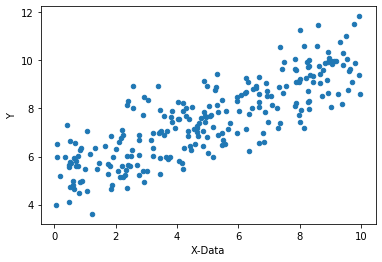

In [10]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data', y='Y')

In [11]:
batch_size = 8 # Huge dataset conn't be calculated so that we should create some batch

In [12]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
x_ph = tf.compat.v1.placeholder(tf.float32,[batch_size])
y_ph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [14]:
# y = m*x + b
y_model = m*x_ph + b

In [15]:
# Cost function
error=tf.reduce_sum(tf.square(y_ph-y_model))

In [16]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [17]:
init = tf.compat.v1.global_variables_initializer()

In [18]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {x_ph: x_data[rand_ind],y_ph: y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
        
    model_m, model_b = sess.run([m,b]) # Coefficient & Intercept

In [19]:
print(model_m,"\n",model_b)

0.50345 
 4.9709897


In [20]:
y_hat = x_data*model_m + model_b

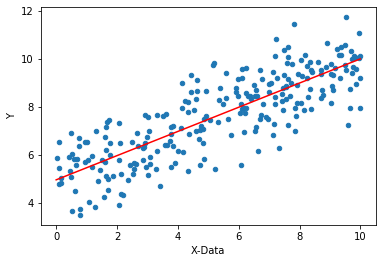

In [21]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data', y='Y')
plt.plot(x_data,y_hat,'r')

# Above all calculation in shortcut way through Estimator API

# Estimator API

In [22]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [23]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ashik\\AppData\\Local\\Temp\\tmp0mazcd5r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000013FAF66D488>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
# Split train and test
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3,random_state=0)

In [26]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [27]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [28]:
test_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [29]:
# Train
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call in

In [30]:
 train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-07-29T23:46:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ashik\AppData\Local\Temp\tmp0mazcd5r\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]

In [31]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-07-29T23:46:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ashik\AppData\Local\Temp\tmp0mazcd5r\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]

In [32]:
input_fu_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x': np.linspace(0,10,10)},shuffle=False)

In [33]:
pred=estimator.predict(input_fn=input_fu_predict)

In [34]:
predictions = []
for x in estimator.predict(input_fn=input_fu_predict):
    predictions.append(x['predictions']) # work as a key in []

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ashik\AppData\Local\Temp\tmp0mazcd5r\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [38]:
predictions

[array([4.334579], dtype=float32),
 array([5.003566], dtype=float32),
 array([5.672553], dtype=float32),
 array([6.3415394], dtype=float32),
 array([7.0105267], dtype=float32),
 array([7.6795135], dtype=float32),
 array([8.3485], dtype=float32),
 array([9.017487], dtype=float32),
 array([9.686474], dtype=float32),
 array([10.355461], dtype=float32)]

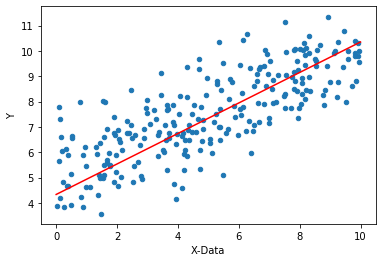

In [36]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data', y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')